Em Python, **random.random()** e **random.seed()** são funções da biblioteca random usadas para gerar números pseudoaleatórios e configurar o gerador de números pseudoaleatórios.

In [1]:
import random

# Definindo a seed para garantir a mesma sequência
random.seed(5)
print(random.random())  # Saída previsível: sempre o mesmo número
print(random.random())  # Outro número previsível

# Reinicializando a mesma seed para obter a mesma sequência novamente
random.seed(5)
print(random.random())  # Repete o primeiro número da sequência anterior
print(random.random())  # Repete o segundo número da sequência anterior

0.6229016948897019
0.7417869892607294
0.6229016948897019
0.7417869892607294


**Função:** random.random() <br>
**Descrição:** Gera um número de ponto flutuante pseudoaleatório entre 0.0 e 1.0, onde 0.0 é inclusivo e 1.0 é exclusivo. <br>
**Como funciona:** Quando você chama random.random(), o Python usa o gerador de números pseudoaleatórios interno (Mersenne Twister, por padrão) para calcular um número dentro desse intervalo.

**Função:** random.seed(a=None, version=2)<br>
**Descrição:** Define a seed (ou "semente") do gerador de números pseudoaleatórios. A seed é um valor inicial que o gerador usa para iniciar o processo de geração de números. Quando você define uma seed, a sequência de números gerados será sempre a mesma, útil para reproduzir resultados aleatórios.<br>
**Argumento a:** A seed pode ser qualquer valor inteiro, uma string, ou até mesmo None. Se None, o Python usa a seed baseada no tempo atual do sistema, que é, em teoria, única em cada execução.<br>
**Repetição controlada:** Se você quer garantir que o mesmo código sempre produza os mesmos números aleatórios, basta definir a seed com um valor fixo (por exemplo, random.seed(10)).

In [2]:
import pandas as pd

In [3]:
# dados é um DataFrame
dados = pd.read_csv("datasus_ano_mes_atendimento.csv", encoding="ISO-8859-1",
            skiprows=3, sep=";", skipfooter=12, thousands=".", decimal=",", engine='python')

In [4]:
pd.options.display.float_format = "{:.2f}".format

In [5]:
colunas_usaveis = dados.mean(numeric_only=True).index.tolist()
colunas_usaveis.insert(0, "Unidade da Federação")
colunas_usaveis[:5]

['Unidade da Federação', '2007/Ago', '2007/Set', '2007/Out', '2007/Nov']

In [6]:
dados_usaveis = dados[colunas_usaveis]

In [7]:
dados_usaveis = dados_usaveis.set_index("Unidade da Federação")

In [8]:
dados_usaveis.T.tail()

Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,...,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal
2024/Mai,12861282.55,4754614.50,22876391.30,2188528.40,55001120.94,4319048.14,10419996.77,42946156.61,22994452.18,71101632.49,...,42769829.70,136072429.19,428749607.48,169917716.59,126936797.86,111319805.97,25354391.53,24906860.84,52553747.50,33190413.51
2024/Jun,9768106.57,4688673.93,20260259.52,884722.40,43314313.68,3886773.65,7534695.08,36400331.90,19405447.28,62516568.45,...,38651579.07,115286093.73,395686213.88,148138020.56,116883521.95,111478826.58,18017774.26,21279899.25,47547418.92,31675400.43
2024/Jul,6856004.53,3704966.38,17275473.78,96973.38,34530139.71,3595900.24,4512158.94,30744488.97,16726173.47,49549960.43,...,37135391.22,106959702.42,361788955.96,130246308.90,99417470.86,93744439.03,10387844.00,17555319.80,43800077.45,28653401.01
2024/Ago,3760689.79,2011641.58,6331333.43,36840.18,14549941.58,2042444.47,2304902.83,15349114.31,9455240.90,24819673.11,...,18618781.18,52101807.89,215013781.33,67428821.43,53691806.21,37622294.14,3849001.55,6999654.47,22197439.34,17658084.35
Total,1488884393.98,626595571.45,2772327408.24,475506983.71,6699094107.75,462687895.62,1443523401.41,5554889062.96,3215780746.99,9349562696.20,...,5091047207.78,15251359005.64,57438896613.00,20947989043.20,11650355173.68,17607594365.50,3410878843.15,3166162750.35,7068621304.24,3776513794.67


<Axes: >

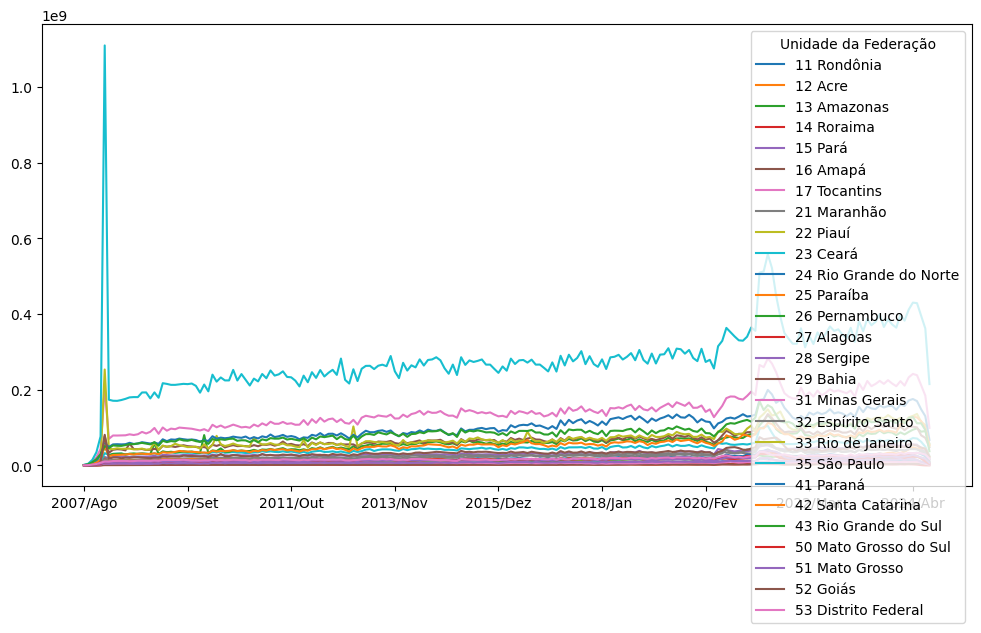

In [9]:
dados_usaveis = dados_usaveis.drop("Total", axis=1)
dados_usaveis.T.plot(figsize=(12,6))

In [10]:
dados_usaveis.T

Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,...,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal
2007/Ago,4209.37,10470.07,35752.72,4785.91,181159.29,33672.74,4113.76,385330.18,220788.25,357904.65,...,57408.11,469469.34,1665349.90,554800.22,693955.05,1049252.33,199556.12,63562.50,179395.82,191951.47
2007/Set,16397.03,14001.71,45570.64,11858.63,433414.74,104822.98,76633.06,1018352.93,353468.67,572356.18,...,284224.80,921646.57,4434168.64,1431708.01,1092964.12,3182913.14,573675.41,232444.62,418053.58,769966.25
2007/Out,133645.19,86200.85,416012.30,43852.67,1893197.50,118378.28,343702.61,2277717.78,1078182.68,1865065.71,...,1152115.25,2994664.57,14577395.84,4630402.44,3562300.82,8571312.11,1069816.66,927219.59,1198730.25,2165619.56
2007/Nov,346912.84,301323.68,2020381.79,369328.51,5105406.44,226661.18,1068685.94,4334468.23,2406035.32,5131814.39,...,2296383.23,7250528.08,35032259.98,11120030.79,7578502.38,16592432.80,1995899.52,1740439.60,2712117.54,3813256.48
2007/Dez,711758.31,769612.36,5949408.99,470676.43,13162823.43,844019.90,3022200.87,8832514.85,4929772.93,10798042.86,...,5724199.54,13627123.27,76668547.41,28790722.87,14772555.10,30134255.70,4277979.14,5394225.43,9293914.78,7121965.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024/Abr,13349073.12,5099228.73,21435715.70,2884172.14,55784755.34,4105034.50,10507800.47,44595517.86,24207730.37,72472844.50,...,43117075.18,130950062.86,430150492.67,175549183.47,128717462.80,127942447.95,27811832.23,27671461.85,54877480.56,32429847.21
2024/Mai,12861282.55,4754614.50,22876391.30,2188528.40,55001120.94,4319048.14,10419996.77,42946156.61,22994452.18,71101632.49,...,42769829.70,136072429.19,428749607.48,169917716.59,126936797.86,111319805.97,25354391.53,24906860.84,52553747.50,33190413.51
2024/Jun,9768106.57,4688673.93,20260259.52,884722.40,43314313.68,3886773.65,7534695.08,36400331.90,19405447.28,62516568.45,...,38651579.07,115286093.73,395686213.88,148138020.56,116883521.95,111478826.58,18017774.26,21279899.25,47547418.92,31675400.43
2024/Jul,6856004.53,3704966.38,17275473.78,96973.38,34530139.71,3595900.24,4512158.94,30744488.97,16726173.47,49549960.43,...,37135391.22,106959702.42,361788955.96,130246308.90,99417470.86,93744439.03,10387844.00,17555319.80,43800077.45,28653401.01


In [11]:
dados_usaveis.T.columns[:5]

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará'], dtype='object', name='Unidade da Federação')

<Axes: >

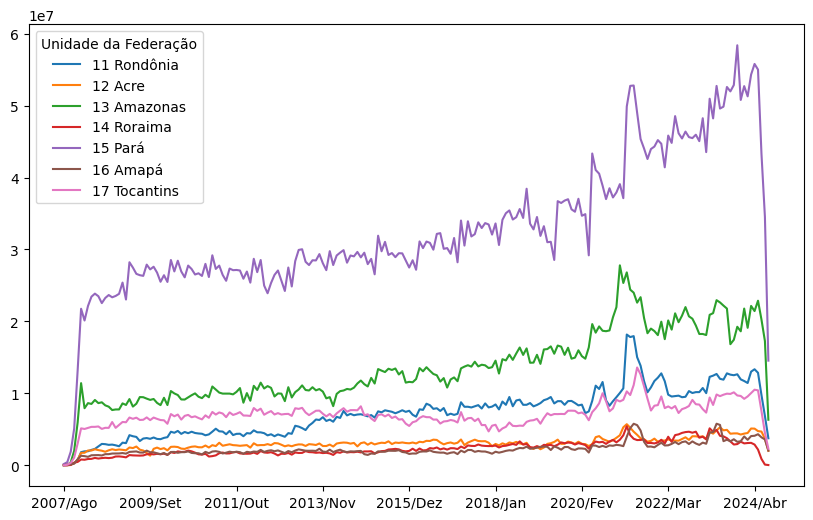

In [12]:
dados_usaveis[:7].T.plot(figsize=(10,6))

<Axes: >

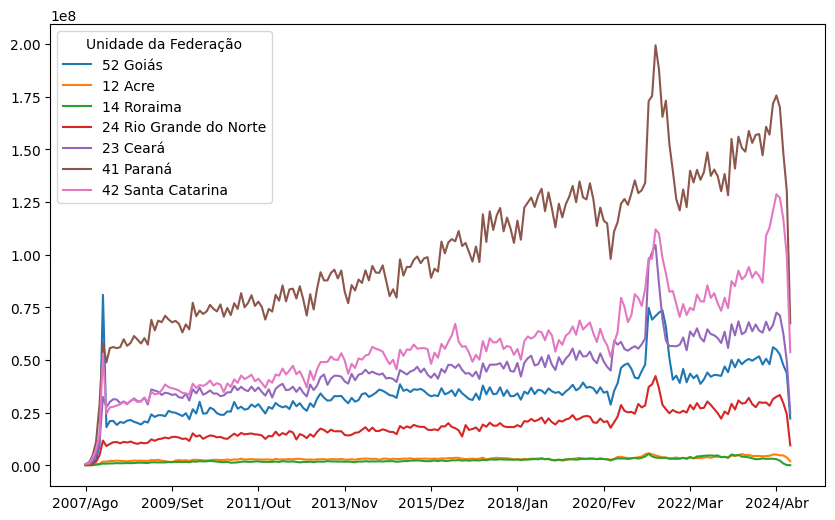

In [13]:
dados_usaveis.sample(7).T.plot(figsize=(10,6))

In [14]:
import numpy as np

np.random.seed(524387)
dados_usaveis.sample(n=7)

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2023/Nov,2023/Dez,2024/Jan,2024/Fev,2024/Mar,2024/Abr,2024/Mai,2024/Jun,2024/Jul,2024/Ago
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
17 Tocantins,4113.76,76633.06,343702.61,1068685.94,3022200.87,5136474.61,5051932.07,5200151.87,5343714.73,5344487.99,...,9706864.31,9638603.35,9238650.05,9572666.16,10048628.92,10507800.47,10419996.77,7534695.08,4512158.94,2304902.83
26 Pernambuco,400640.85,1088340.42,2973553.48,6699828.82,16919031.39,51279301.86,26222079.10,30716361.81,30589332.79,31424612.72,...,86805793.59,80118606.78,87240058.79,82036485.05,88557591.45,94348490.15,98100625.89,89107158.25,90930857.40,57216640.59
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,206939042.57,70301089.50,79119005.51,79046322.41,79268070.12,...,216440679.42,209372475.25,222791294.49,210938288.42,232764148.64,241833974.57,238416356.59,211865858.85,184465640.53,99259562.35
22 Piauí,220788.25,353468.67,1078182.68,2406035.32,4929772.93,11375419.37,9711680.20,10428191.09,10227943.00,10562148.66,...,22267422.47,21023512.84,22103927.75,20653391.11,23567273.16,24207730.37,22994452.18,19405447.28,16726173.47,9455240.90
25 Paraíba,97352.78,368130.43,1002088.64,2149873.40,5448177.36,16599004.84,10871589.62,12348758.14,12680965.13,13258411.71,...,33518859.80,31292332.79,33307864.73,36468815.02,42413868.51,47842245.86,44813129.67,45826732.44,44555873.05,23737313.95
29 Bahia,135146.36,448349.75,1382038.11,3348779.62,11948984.56,77288445.28,33410124.06,41405253.46,42826993.62,42174486.99,...,99861089.46,96705111.00,102671249.75,93205596.61,101899678.08,102392432.52,100616909.42,79578696.12,72916678.16,48368302.62
42 Santa Catarina,693955.05,1092964.12,3562300.82,7578502.38,14772555.10,53034384.67,24409572.92,27483480.50,27806641.44,28354279.52,...,89919811.34,86671894.65,108988127.17,112828240.60,120675673.23,128717462.80,126936797.86,116883521.95,99417470.86,53691806.21


<Axes: >

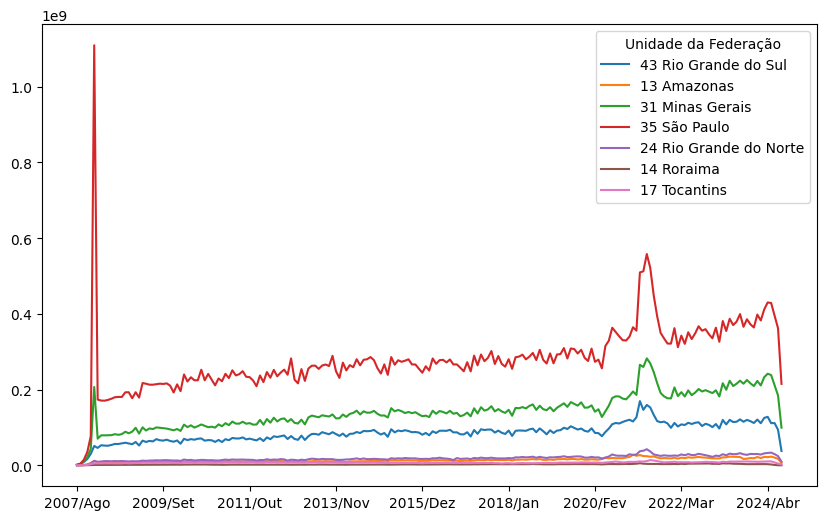

In [15]:
dados_dos_7_estados = dados_usaveis.sample(n=7)
dados_dos_7_estados.T.plot(figsize=(10,6))

In [16]:
dados_usaveis["Total"] = dados_usaveis.sum(axis = 1)
ordenados_por_total = dados_usaveis.sort_values(by="Total", ascending=False)
ordenados_por_total = ordenados_por_total.drop("Total", axis=1)
# ordenados_por_total.drop("Total", axis=1, inplace=True)
ordenados_por_total.head(5)

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2023/Nov,2023/Dez,2024/Jan,2024/Fev,2024/Mar,2024/Abr,2024/Mai,2024/Jun,2024/Jul,2024/Ago
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1109591088.19,173625104.40,170916242.28,170636984.75,172777896.40,...,372494587.87,364026537.40,398034401.65,382585848.89,411765710.86,430150492.67,428749607.48,395686213.88,361788955.96,215013781.33
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,206939042.57,70301089.50,79119005.51,79046322.41,79268070.12,...,216440679.42,209372475.25,222791294.49,210938288.42,232764148.64,241833974.57,238416356.59,211865858.85,184465640.53,99259562.35
41 Paraná,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,58081334.45,48855046.46,55611791.07,56115135.82,55574831.93,...,157215693.47,147155967.57,160670501.57,156942815.98,171630158.84,175549183.47,169917716.59,148138020.56,130246308.90,67428821.43
43 Rio Grande do Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,51064610.03,45897704.82,52928695.92,51972416.77,51679350.79,...,116564056.54,111725578.79,120763821.77,111128672.13,125206175.47,127942447.95,111319805.97,111478826.58,93744439.03,37622294.14
33 Rio de Janeiro,469469.34,921646.57,2994664.57,7250528.08,13627123.27,253437962.44,44128159.73,42933765.97,45324789.60,43951349.46,...,125597741.82,120267000.87,125796349.58,114498328.83,127021224.93,130950062.86,136072429.19,115286093.73,106959702.42,52101807.89


<Axes: >

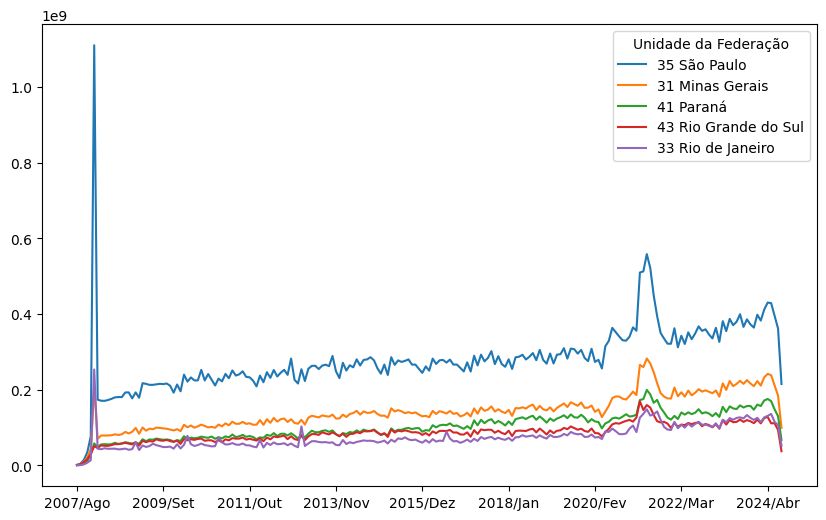

In [17]:
ordenados_por_total.head(5).T.plot(figsize=(10,6))

<Axes: >

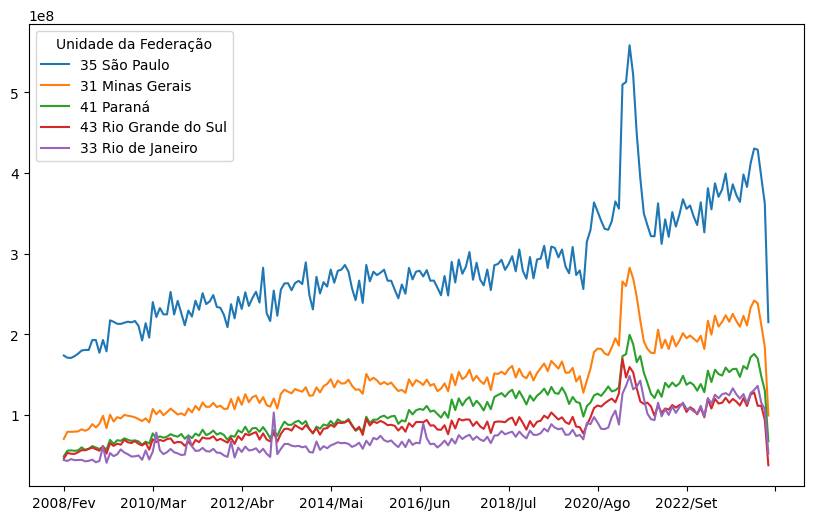

In [18]:
colunas_interessadas = ordenados_por_total.columns[6:]
ordenados_por_total = ordenados_por_total[colunas_interessadas]
ordenados_por_total.head(5).T.plot(figsize=(10,6))

In [19]:
ordenados_por_total = ordenados_por_total / 1_000_000

Text(0.5, 0, 'mês')

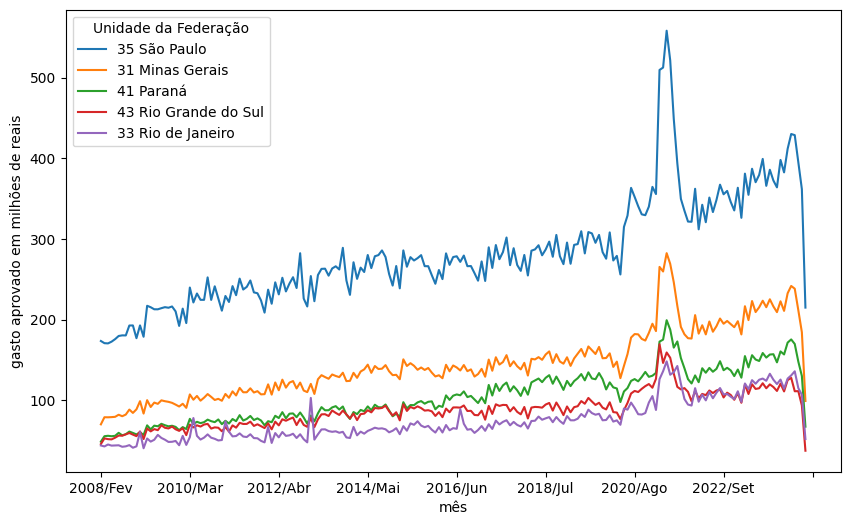

In [20]:
axis = ordenados_por_total.head(5).T.plot(figsize=(10,6))
axis.set_ylabel("gasto aprovado em milhões de reais")
axis.set_xlabel("mês")

In [21]:
# Escolhendo somente a partir da coluna 47 em diante (slicing)
meses_filtrados = ordenados_por_total.columns[47:]

In [22]:
# exibindo as linhas, mas somente as colunas a partir da 47 até o final do DataFrame
ordenados_por_total.iloc[:, 47:].head()

,2012/Jan,2012/Fev,2012/Mar,2012/Abr,2012/Mai,2012/Jun,2012/Jul,2012/Ago,2012/Set,2012/Out,...,2023/Nov,2023/Dez,2024/Jan,2024/Fev,2024/Mar,2024/Abr,2024/Mai,2024/Jun,2024/Jul,2024/Ago
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,237.26,219.78,246.32,231.38,252.01,235.05,244.86,252.66,239.28,282.40,...,372.49,364.03,398.03,382.59,411.77,430.15,428.75,395.69,361.79,215.01
31 Minas Gerais,119.86,107.16,122.20,112.57,125.69,115.81,122.01,123.96,114.79,122.10,...,216.44,209.37,222.79,210.94,232.76,241.83,238.42,211.87,184.47,99.26
41 Paraná,74.22,72.97,80.91,78.14,85.40,77.80,83.52,83.84,79.19,84.99,...,157.22,147.16,160.67,156.94,171.63,175.55,169.92,148.14,130.25,67.43
43 Rio Grande do Sul,71.52,64.14,73.62,69.01,76.61,74.79,76.92,78.76,69.41,77.16,...,116.56,111.73,120.76,111.13,125.21,127.94,111.32,111.48,93.74,37.62
33 Rio de Janeiro,67.03,47.27,59.50,54.16,60.81,56.05,56.68,58.67,53.37,58.05,...,125.60,120.27,125.80,114.50,127.02,130.95,136.07,115.29,106.96,52.10


<Axes: >

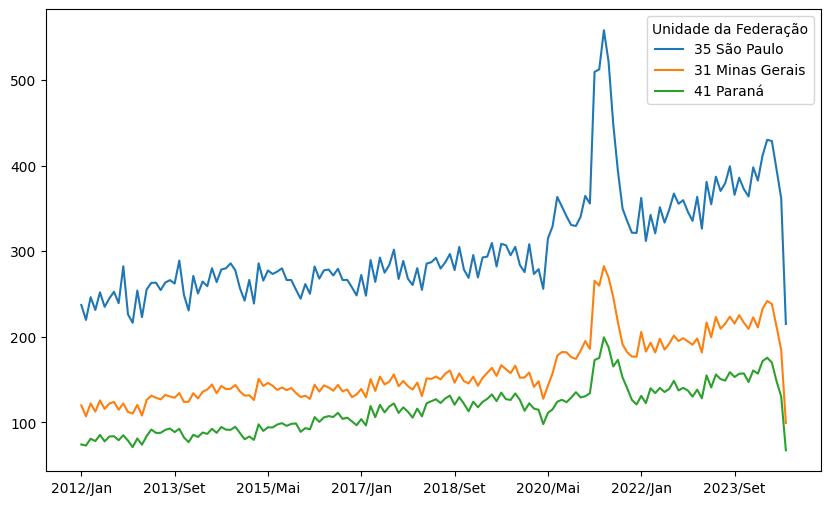

In [23]:
# selecionando as colunas a partir de 'meses_filtrados'
# exibindo as 3 primeiras linhas
# transpondo os dados e plotando
ordenados_por_total[meses_filtrados].head(3).T.plot(figsize=(10,6))

# é possível notar que o gráfico ficou mais legível

In [24]:
# criando uma função para 'plotar' os gastos mensais em função de um parâmetro (variável) dados
def plota_gastos_por_mes(dados):
  axis = dados.T.plot(figsize=(10,6))
  axis.set_ylabel("gasto aprovado em milhões de reais")
  axis.set_xlabel("mês")

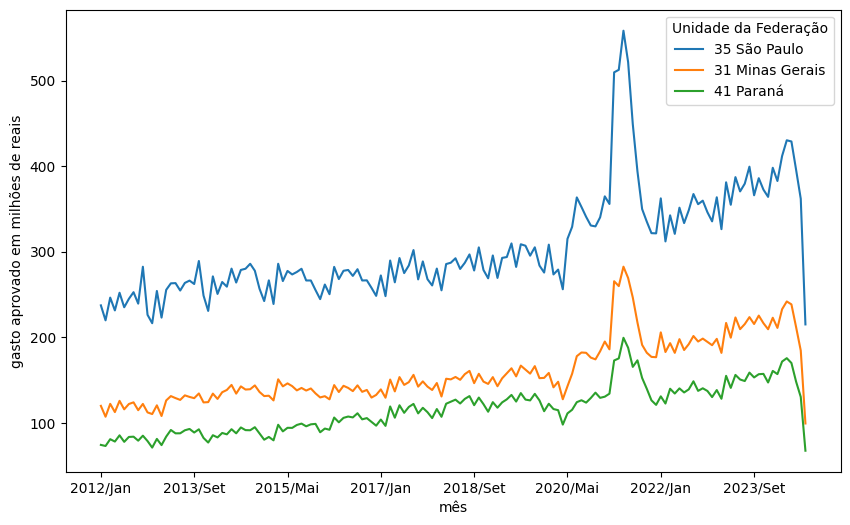

In [25]:
plota_gastos_por_mes(ordenados_por_total[meses_filtrados].head(3))

(0.0, 700.0)

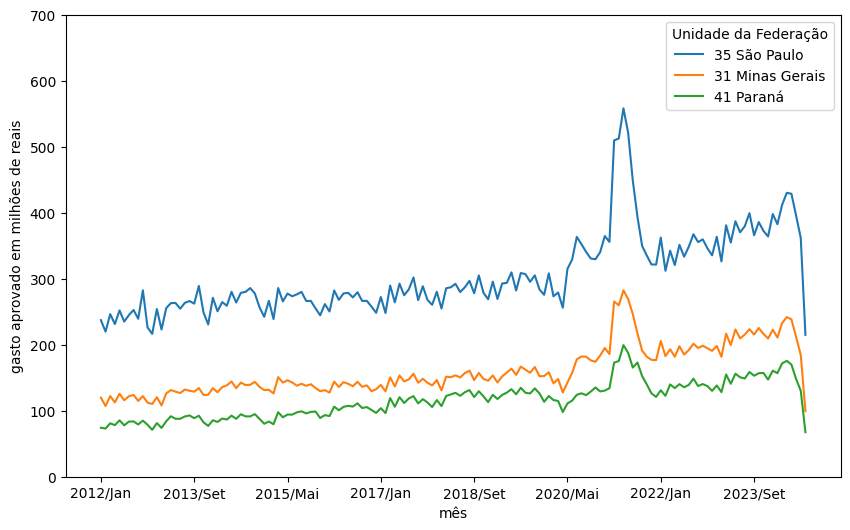

In [26]:
import matplotlib.pyplot as plt

# definindo um limite para os eixos do gráfico
plota_gastos_por_mes(ordenados_por_total[meses_filtrados].head(3))
plt.ylim(0, 700) # ajusta o limite vertical do gráfico para exibir valores entre 0 e 700

(0.0, 350.0)

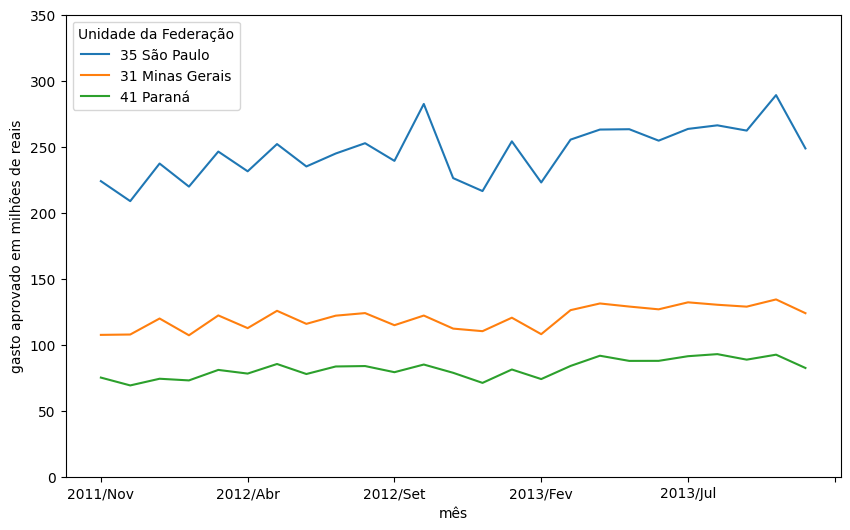

In [27]:
# selecionado apenas as colunas 45 a 70
plota_gastos_por_mes(ordenados_por_total[ordenados_por_total.columns[45:70]].head(3))
plt.ylim(0, 350)

(0.0, 700.0)

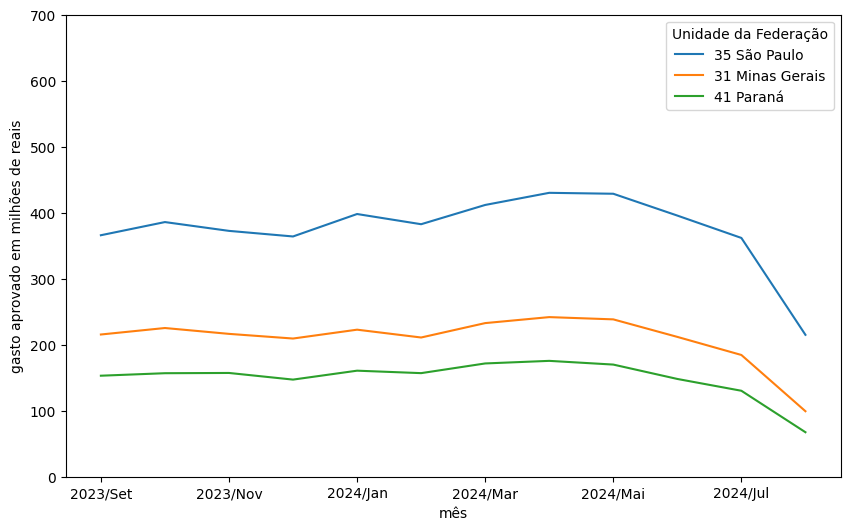

In [28]:
# selecionando as últimas 12 colunas e as 3 primeiras linhas do DataFrame
plota_gastos_por_mes(ordenados_por_total[ordenados_por_total.columns[-12:]].head(3))
plt.ylim(0, 700)

**Sintaxe**<br>
ordenados_por_total.columns: acessa todas as colunas do DataFrame ordenados_por_total.

[-12:]: usa slicing para selecionar as últimas 12 colunas da lista de colunas, indo do final (-12) até o último elemento.

ordenados_por_total[ ... ]: coloca as colunas selecionadas como índice para acessar apenas essas colunas do DataFrame.

.head(3): retorna as três primeiras linhas das colunas selecionadas.

(80.0, 700.0)

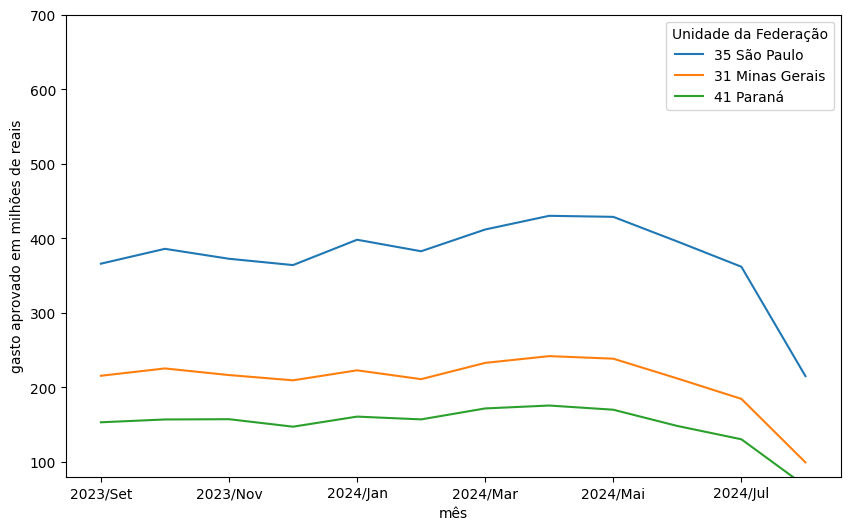

In [29]:
plota_gastos_por_mes(ordenados_por_total[ordenados_por_total.columns[-12:]].head(3))
plt.ylim(80, 700) # testando um limite distinto

(0.0, 640.0)

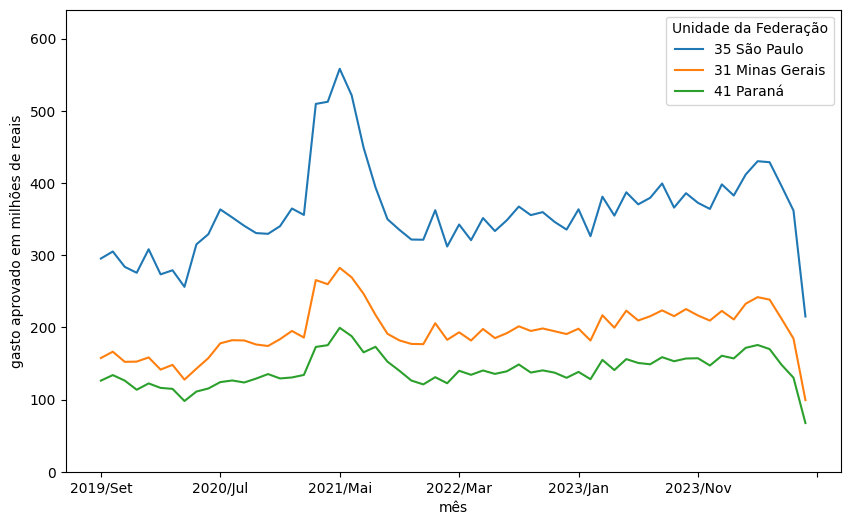

In [30]:
# Selecionando as últimas 60 colunas
plota_gastos_por_mes(ordenados_por_total[ordenados_por_total.columns[-60:]].head(3))
plt.ylim(0, 640) # Limite de 0 a 640

(0.0, 640.0)

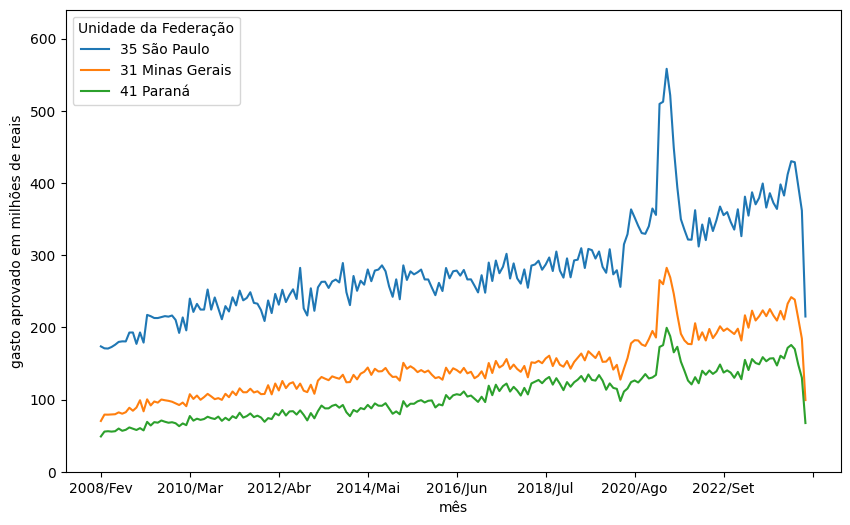

In [31]:
plota_gastos_por_mes(ordenados_por_total.head(3)) # Selecionando as 3 primeiras linhas (3 estados)
plt.ylim(0, 640)

(0.0, 640.0)

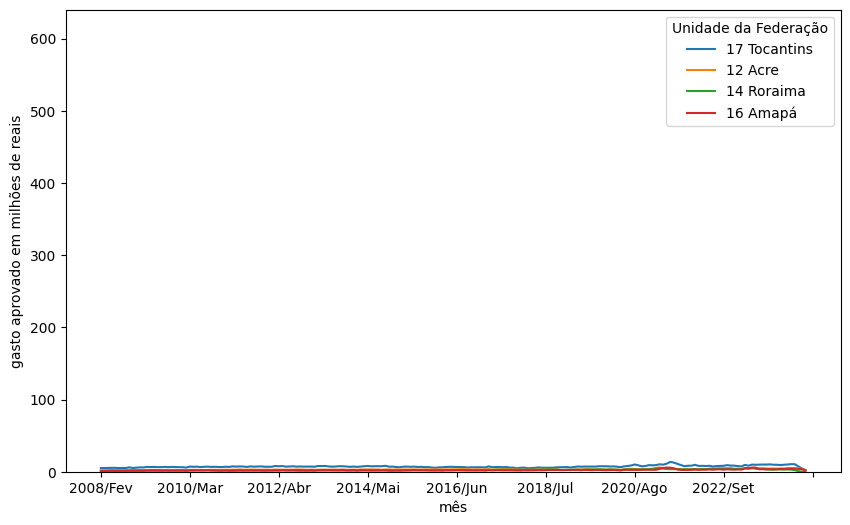

In [32]:
plota_gastos_por_mes(ordenados_por_total.tail(4)) # Selecionando as 4 últimas linhas (4 estados)
plt.ylim(0, 640)

<Figure size 600x600 with 0 Axes>

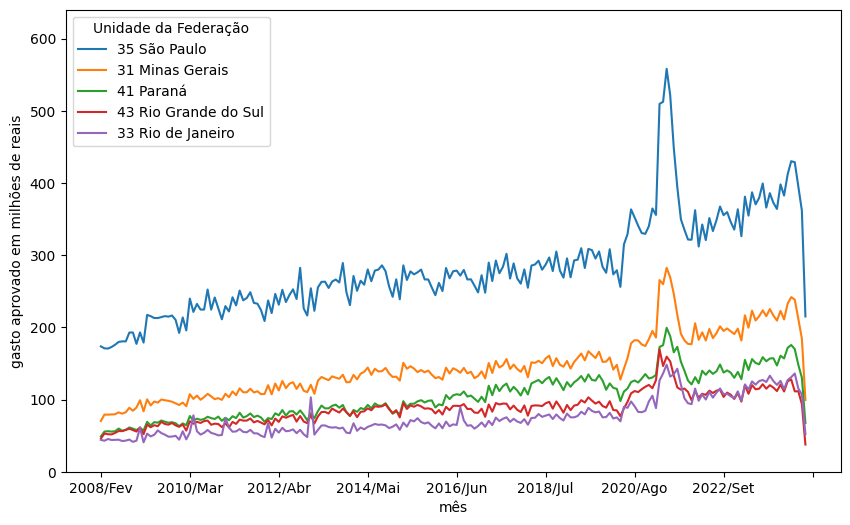

In [33]:
plt.figure(figsize=(6, 6))  # Configurando o tamanho da figura
plota_gastos_por_mes(ordenados_por_total.head(5))  # Chamando a função sem figsize
plt.ylim(0, 640)  # Ajustando os limites do eixo Y
plt.show()  # Exibindo o gráfico

<Figure size 2000x600 with 0 Axes>

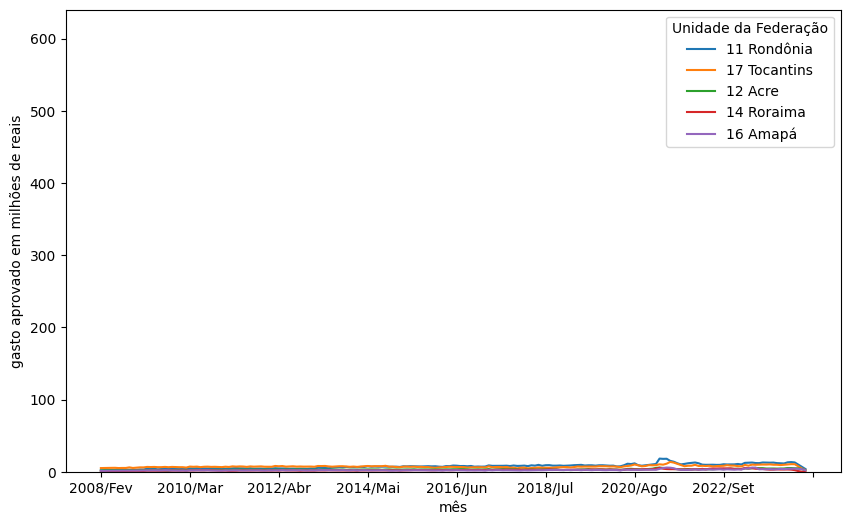

In [34]:
plt.figure(figsize=(20, 6))  # Configurando o tamanho da figura
plota_gastos_por_mes(ordenados_por_total.tail(5))  # Chamando a função sem figsize
plt.ylim(0, 640)  # Ajustando os limites do eixo Y
plt.show()  # Exibindo o gráfico

<Figure size 2500x300 with 0 Axes>

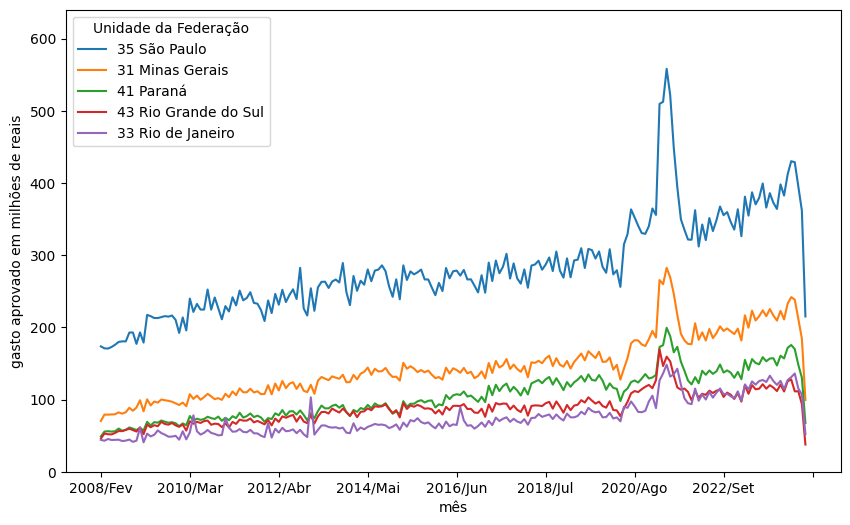

In [35]:
plt.figure(figsize=(25, 3))  # Configurando o tamanho da figura
plota_gastos_por_mes(ordenados_por_total.head(5))  # Chamando a função sem figsize
plt.ylim(0, 640)  # Ajustando os limites do eixo Y
plt.show()  # Exibindo o gráfico

**Desafio I:** padronizar os ticks verticais para espaçamento de 12 em 12 unidades (uma vez ao ano).

**Desafio II:** escolher e utilizar outras cores para saltar mais aos olhos.

**Desafio III:** colocar uma grade (grid) horizontal e vertical que não seja intrusivo.

A função `col.split('/')[0]` extrai o ano do nome da coluna (assumindo que o nome das colunas segue o padrão 'YYYY/MM').
O argumento `axis=1` indica que o agrupamento é feito nas colunas.

A função lambda é uma forma concisa de criar funções anônimas (ou seja, sem nome) em Python.
Abaixo se utiliza 'lambda col: col.split('/')[0]'

1. **col:**
Este é o parâmetro da função lambda. Cada nome de coluna no DataFrame será passado como argumento para essa função. Representa o nome de cada coluna do DataFrame.

2. **col.split('/'):**
O método .split('/') divide a string da coluna onde houver uma barra (/).

3. **col.split('/')[0]:**
Acessa o primeiro elemento da lista resultante da divisão, que é o ano (como string).

<ipython-input-36-d65d1f68a494>:3: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  ordenados_anual = ordenados_por_total.groupby(lambda col: col.split('/')[0], axis=1).sum()


<Figure size 2500x300 with 0 Axes>

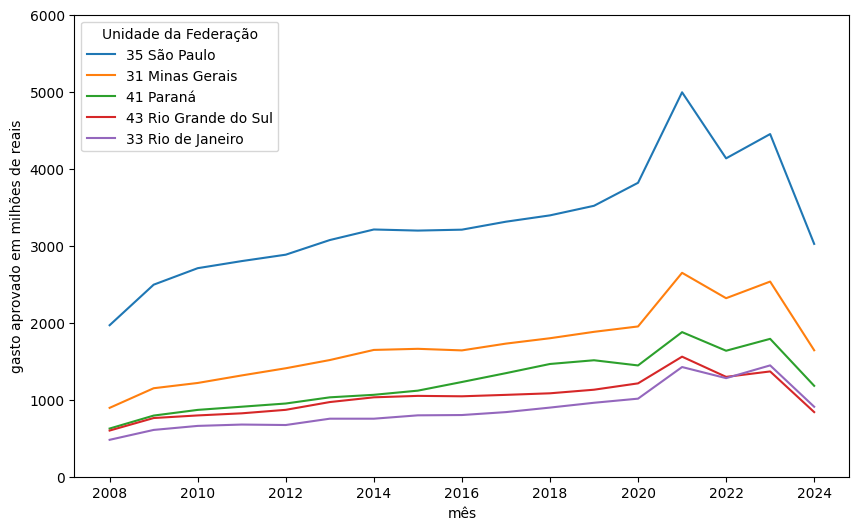

In [36]:
# Desafio I
# Agrupando os dados por ano e somando os valores correspondentes.
# ordenados_anual = ordenados_por_total.groupby(lambda col: col.split('/')[0], axis=1).sum()

# Definindo uma função para extrair o ano da string (parte antes da barra '/')
def extrair_ano(coluna):
    # A função retorna a parte da string antes da barra '/'
    return coluna.split('/')[0]

# Realizando o agrupamento por ano (extrai o ano de cada coluna)
# O método `groupby` agrupa as colunas com base no resultado da função `extrair_ano`
# Depois, aplicamos a soma (`sum()`) sobre os valores agrupados
ordenados_anual = ordenados_por_total.groupby(extrair_ano, axis=1).sum()

# Definindo o tamanho da figura para garantir uma visualização clara do gráfico.
plt.figure(figsize=(25, 3))

plota_gastos_por_mes(ordenados_anual.head(5))

# Definindo o limite do eixo Y para restringir a altura do gráfico.
plt.ylim(0, 6000)

# Exibindo o gráfico gerado.
plt.show()


O **Seaborn** é uma biblioteca de visualização de dados para Python que torna mais fácil criar gráficos bonitos e informativos. Ele foi construído em cima do Matplotlib, que é outra biblioteca de gráficos muito popular, mas o Seaborn simplifica várias tarefas e tem um foco especial na criação de gráficos estatísticos.

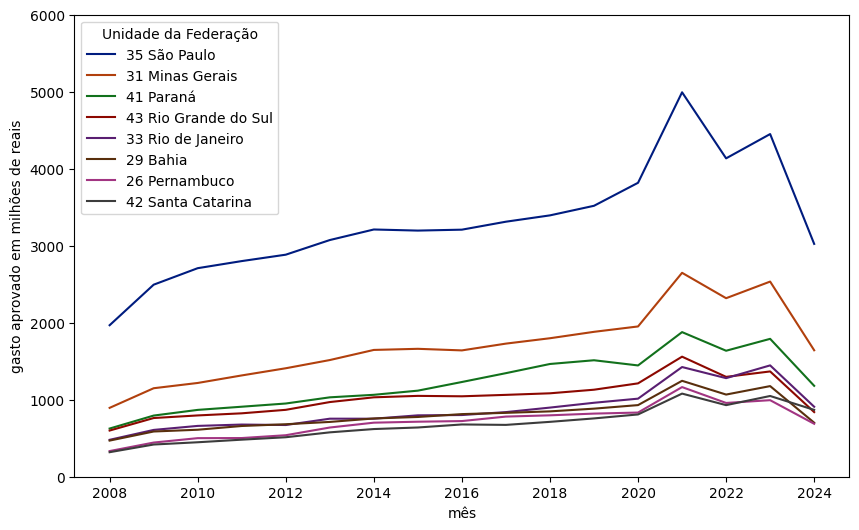

In [46]:
# Desafio II
import seaborn as sns # Importando a biblioteca 'seaborn'
sns.set_palette("dark") # Palheta com cores mais escuras, com bom contraste.
plota_gastos_por_mes(ordenados_anual.head(8))
plt.ylim(0, 6000)
plt.show()

A função **grid()** do Matplotlib é uma ferramenta simples e poderosa para adicionar grades aos seus gráficos, melhorando a visualização e a compreensão dos dados. Ao personalizar os parâmetros da função, você pode criar grades que se adaptem perfeitamente às suas necessidades.

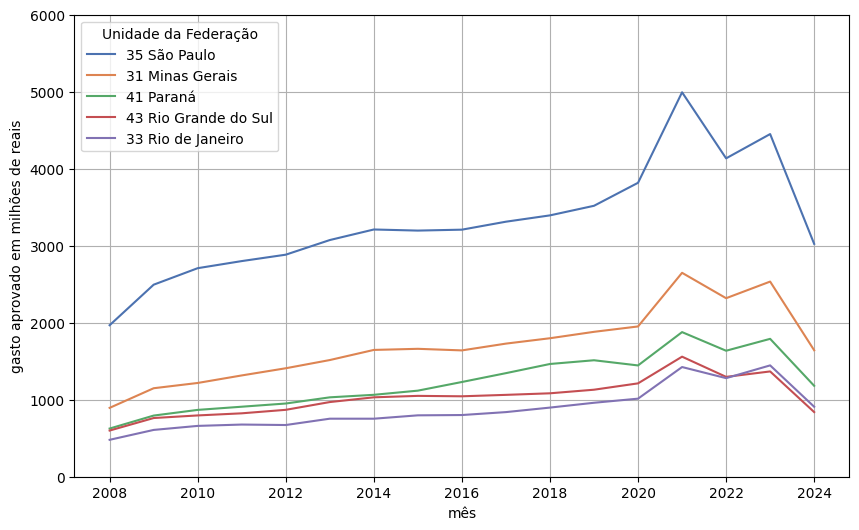

In [47]:
# Desafio III
sns.set_palette("deep") # Palheta com cores mais suaves
plota_gastos_por_mes(ordenados_anual.head(5))
plt.ylim(0, 6000)
plt.grid(True) # Adicionando grade ao gráfico
plt.show()